In [22]:
import joblib
import numpy as np

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [23]:
clf = joblib.load('data/log_reg_model.joblib')

In [24]:
data = np.load('data/normed_transformed_data.npy')
train_indices = np.load('data/train_indices.npy')
val_indices = np.load('data/val_indices.npy')
test_indices = np.load('data/test_indices.npy')


cell_file = "data/cells.npy"
cells = np.load(cell_file, allow_pickle=True).ravel()[0]
cell_classes = cells["classes"]  # cell classes

Xtrain = data[train_indices,:]
Ytrain = cell_classes[train_indices]

Xval = data[val_indices,:]
Yval = cell_classes[val_indices]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'CD14+ Monocyte'),
  Text(1, 0, 'CD19+ B'),
  Text(2, 0, 'CD34+'),
  Text(3, 0, 'CD4+ T Helper2'),
  Text(4, 0, 'CD4+/CD25 T Reg'),
  Text(5, 0, 'CD4+/CD45RA+/CD25- Naive T'),
  Text(6, 0, 'CD4+/CD45RO+ Memory'),
  Text(7, 0, 'CD56+ NK'),
  Text(8, 0, 'CD8+ Cytotoxic T'),
  Text(9, 0, 'CD8+/CD45RA+ Naive Cytotoxic'),
  Text(10, 0, 'Dendritic')])

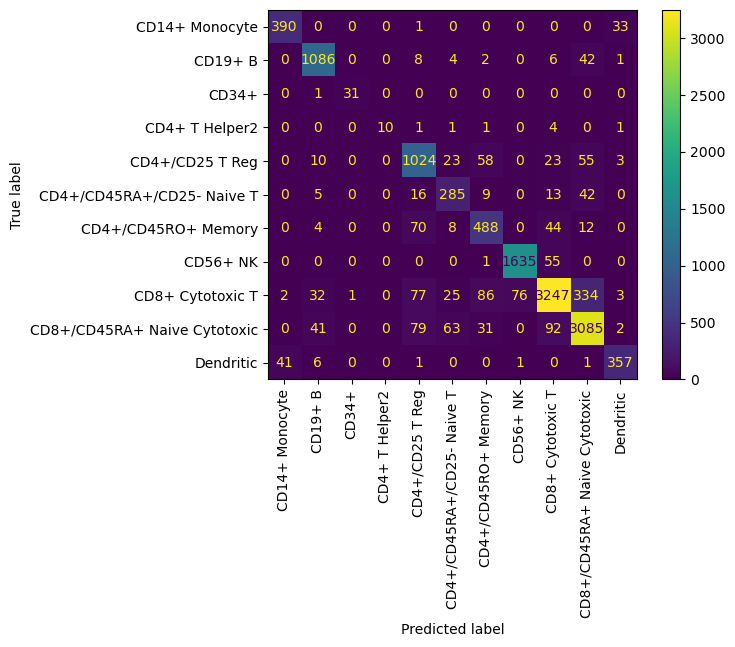

In [11]:
_ = ConfusionMatrixDisplay.from_estimator(clf, Xval, Yval)
plt.xticks(rotation=90)

In [4]:
pred_val = clf.predict(Xval)
pred_train = clf.predict(Xtrain)

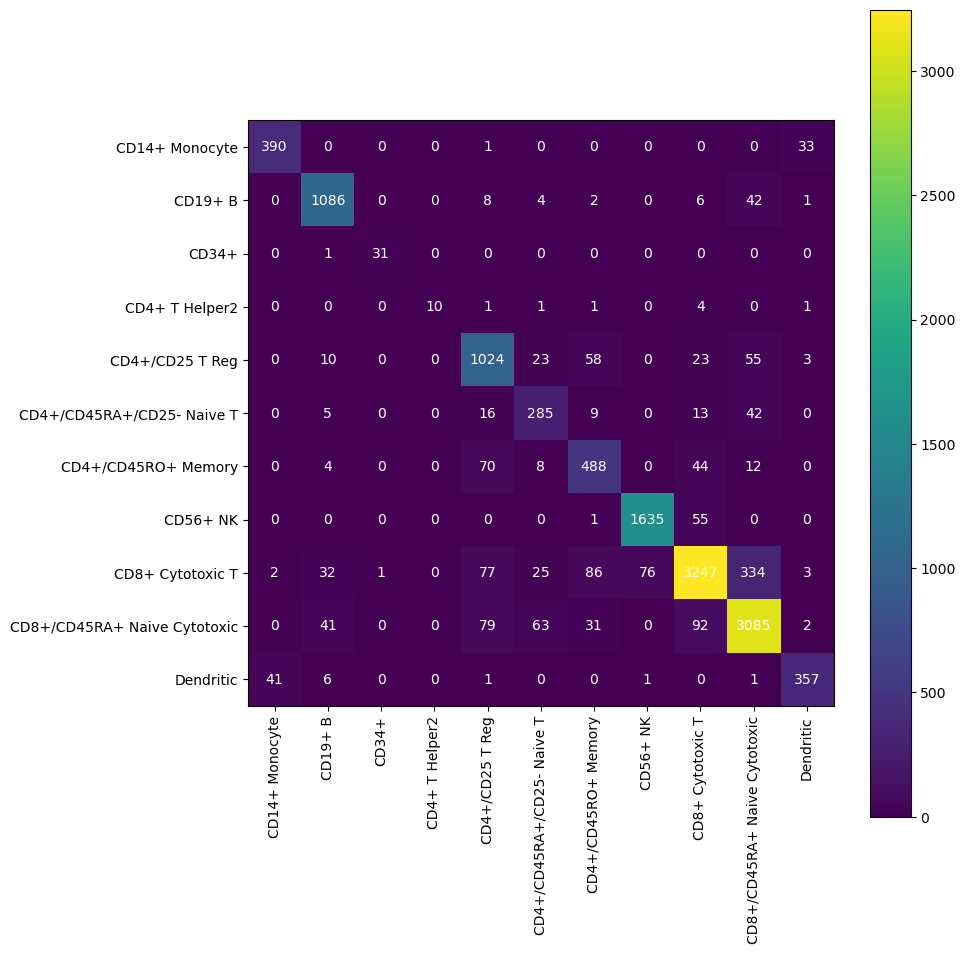

In [26]:
plt.figure(figsize=(10,10))
confusion_mat = confusion_matrix(Yval, pred_val, labels=np.unique(cell_classes))
plt.imshow(confusion_mat)
plt.xticks(range(len(list(np.unique(cell_classes)))), rotation=90)
plt.yticks(range(len(list(np.unique(cell_classes)))))
plt.gca().set_xticklabels(np.unique(cell_classes))
plt.gca().set_yticklabels(np.unique(cell_classes))
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        plt.gca().text(j, i, f'{confusion_mat[i, j]}', 
                ha='center', va='center', color='white')
plt.colorbar()
plt.tight_layout()
plt.savefig("plots/confusion_mat.png")

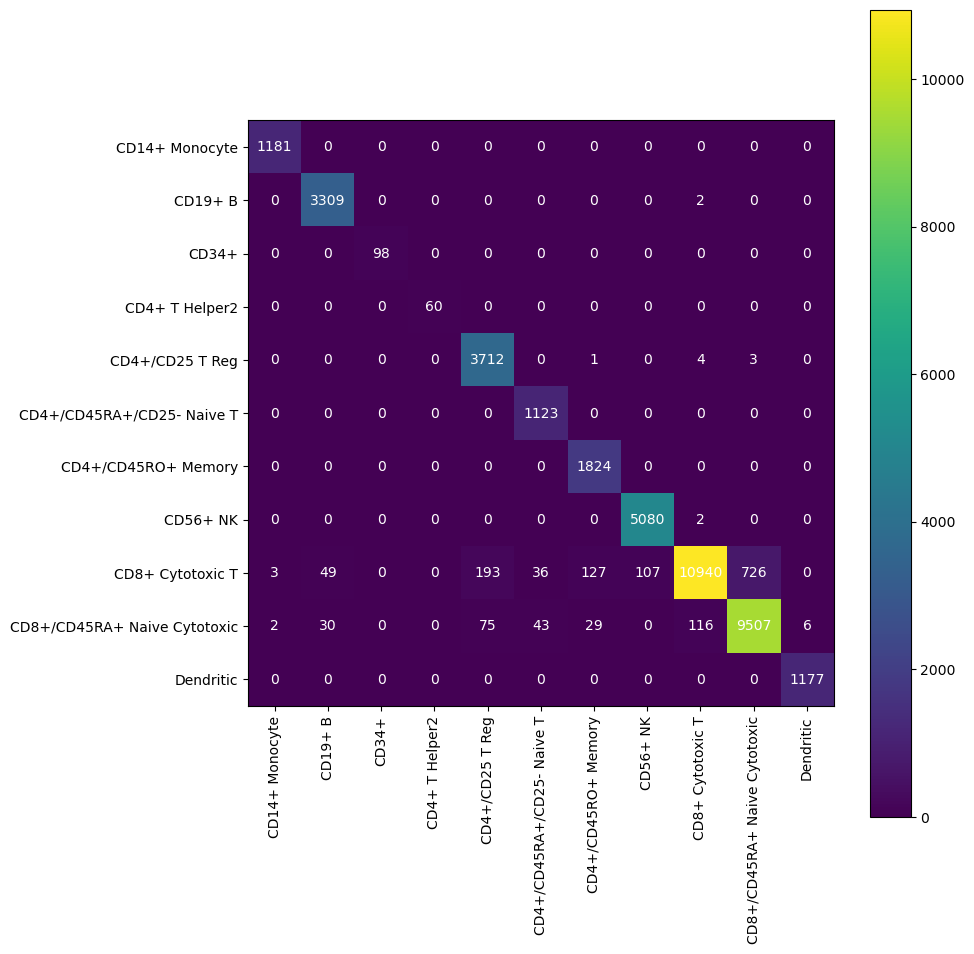

In [28]:
plt.figure(figsize=(10,10))
confusion_mat_train = confusion_matrix(Ytrain, pred_train, labels=np.unique(cell_classes))
plt.imshow(confusion_mat_train)
plt.xticks(range(len(list(np.unique(cell_classes)))), rotation=90)
plt.yticks(range(len(list(np.unique(cell_classes)))))
plt.gca().set_xticklabels(np.unique(cell_classes))
plt.gca().set_yticklabels(np.unique(cell_classes))
for i in range(confusion_mat_train.shape[0]):
    for j in range(confusion_mat_train.shape[1]):
        plt.gca().text(j, i, f'{confusion_mat_train[i, j]}', 
                ha='center', va='center', color='white')
plt.colorbar()
plt.tight_layout()
plt.savefig("plots/confusion_mat_train.png")

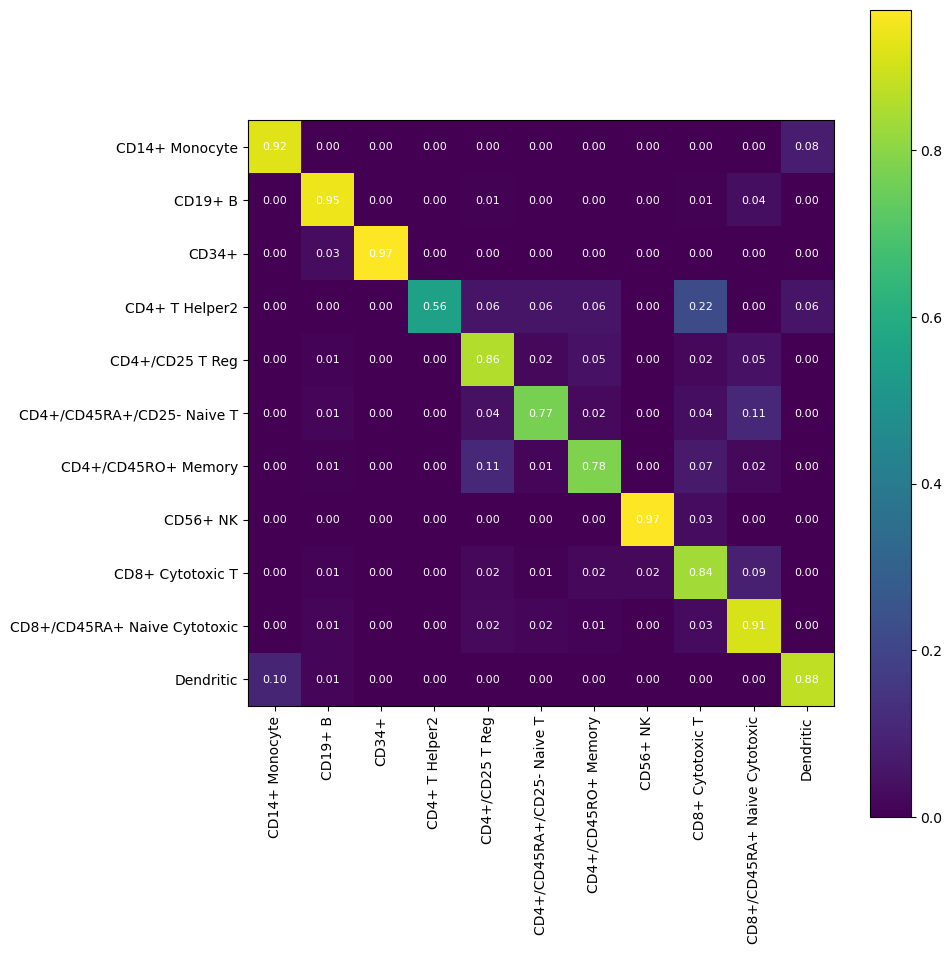

In [29]:
plt.figure(figsize=(10,10))
confusion_ratios = confusion_mat / confusion_mat.sum(axis=1, keepdims=True)
plt.imshow(confusion_ratios)
plt.xticks(range(len(list(np.unique(cell_classes)))), rotation=90)
plt.yticks(range(len(list(np.unique(cell_classes)))))
plt.gca().set_xticklabels(np.unique(cell_classes))
plt.gca().set_yticklabels(np.unique(cell_classes))

for i in range(confusion_ratios.shape[0]):
    for j in range(confusion_ratios.shape[1]):
        plt.gca().text(j, i, f'{confusion_ratios[i, j]:.2f}', 
                ha='center', va='center', color='white', fontsize=8)
        
plt.colorbar()
plt.tight_layout()
plt.savefig("plots/confusion_ratio.png")

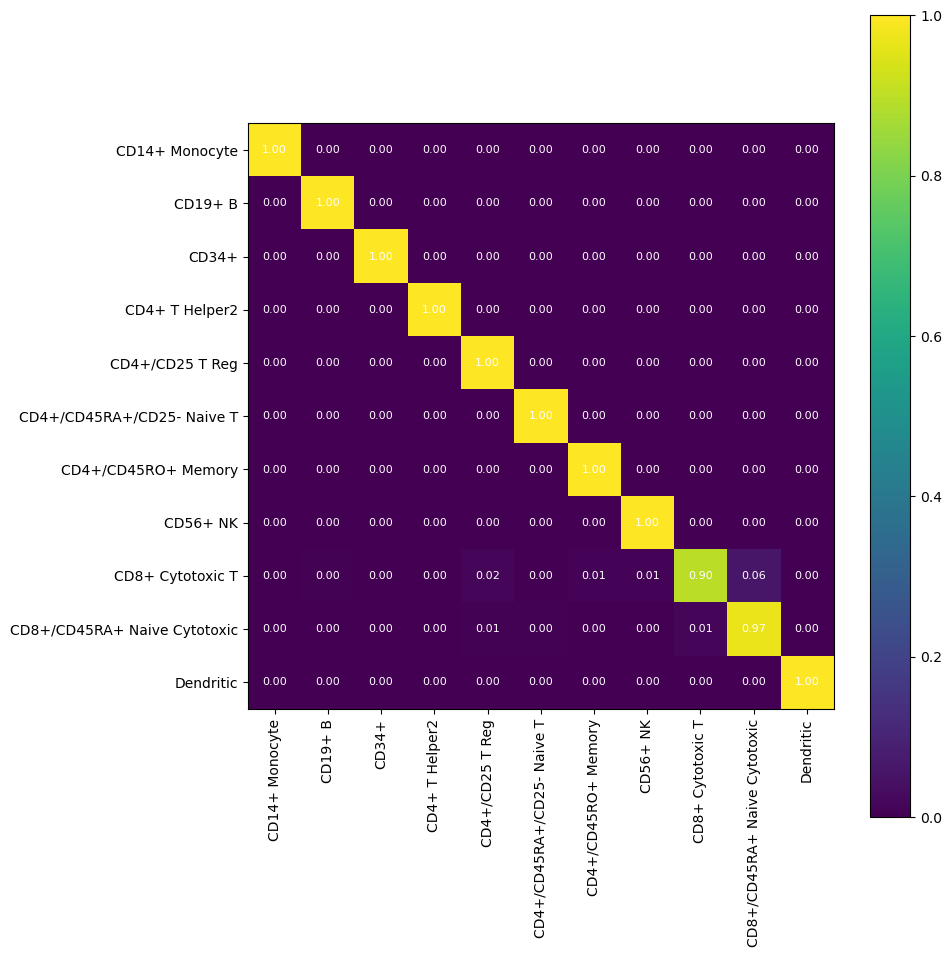

In [30]:
plt.figure(figsize=(10,10))
confusion_ratios_train = confusion_mat_train / confusion_mat_train.sum(axis=1, keepdims=True)
plt.imshow(confusion_ratios_train)
plt.xticks(range(len(list(np.unique(cell_classes)))), rotation=90)
plt.yticks(range(len(list(np.unique(cell_classes)))))
plt.gca().set_xticklabels(np.unique(cell_classes))
plt.gca().set_yticklabels(np.unique(cell_classes))

for i in range(confusion_ratios.shape[0]):
    for j in range(confusion_ratios.shape[1]):
        plt.gca().text(j, i, f'{confusion_ratios_train[i, j]:.2f}', 
                ha='center', va='center', color='white', fontsize=8)
        
plt.colorbar()
plt.tight_layout()
plt.savefig("plots/confusion_ratio_train.png")